<a href="https://colab.research.google.com/github/Goodnessmbakara/LiskPredictTradeUI/blob/main/BRITISH_AIRWAYS_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
# MOUNTING DRIVE
from google.colab import drive
drive.mount('project_british_1')

Mounted at project_british_1


In [1]:
#IMPORTING LIBRARIES FOR ANALYSIS & VISUALIZATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# IMPORTING LIBRARIES, MODULES & FUNCTIONS FOR MODEL BUILDING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import(
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    r2_score,
    mean_absolute_error,
    classification_report
)



In [3]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
df["flight_day"].dtypes

dtype('O')

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# EXPLORATORY DATA ANALYSIS
#1. Carrying out a Uni-variate analysis on our Target variable "booking_complete".


Target variable distribution:
 booking_complete
0    42522
1     7478
Name: count, dtype: int64

WE ALREADY HAVE  AN IMBALANCED CLASS DISTRIBUTION, AS SEEN ABOVE.


/tmp/ipython-input-11-2768942684.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='booking_complete', y='count', data=target_dist, palette='viridis')


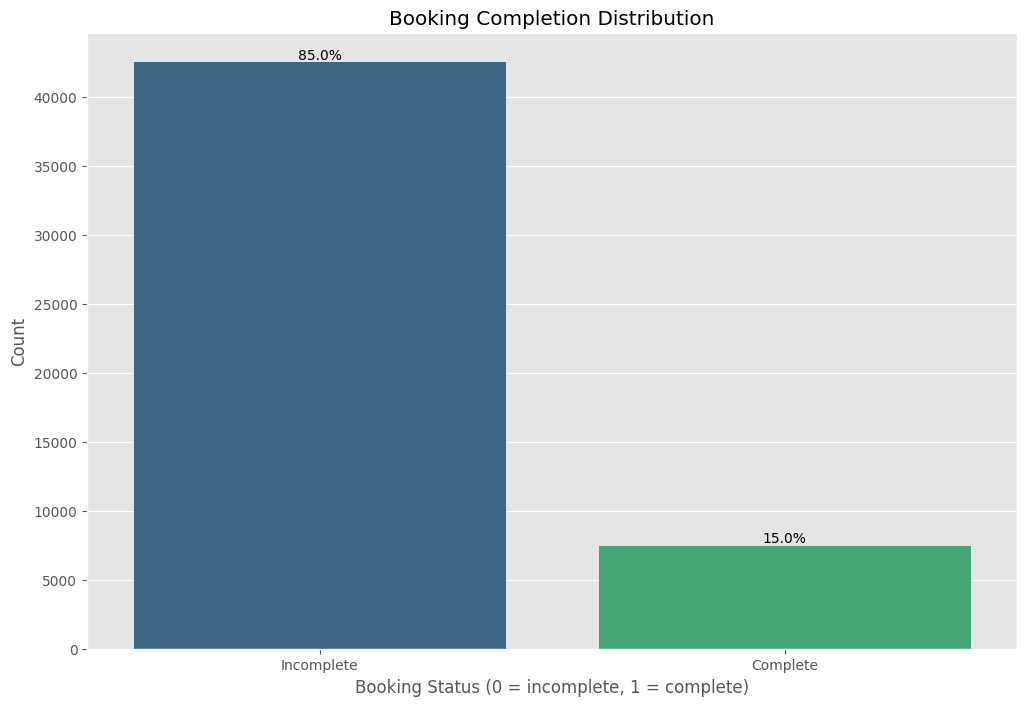

In [11]:
print("\nTarget variable distribution:\n", df['booking_complete'].value_counts()) # Displaying the Target class distribution
print("\nWE ALREADY HAVE  AN IMBALANCED CLASS DISTRIBUTION, AS SEEN ABOVE.")

# Setting up visualization style
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))

target_dist = df['booking_complete'].value_counts().reset_index()
target_dist.columns = ['booking_complete', 'count']
sns.barplot(x='booking_complete', y='count', data=target_dist, palette='viridis')
plt.title('Booking Completion Distribution')
plt.xlabel('Booking Status (0 = incomplete, 1 = complete)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Incomplete', 'Complete'])

# Add percentage labels
total = len(df)
for i, count in enumerate(target_dist['count']):
    plt.text(i, count+200, f'{count/total:.1%}', ha='center')




*A Huge Imbalance is seen here in the Target class distribution & will be greatly considered when building my model*


#2. Bi-variate analysis on the Sales Channel and Booking_complete
* *indicating the rate at which bookings were completed for internet & mobile*

(0.0, 0.3)

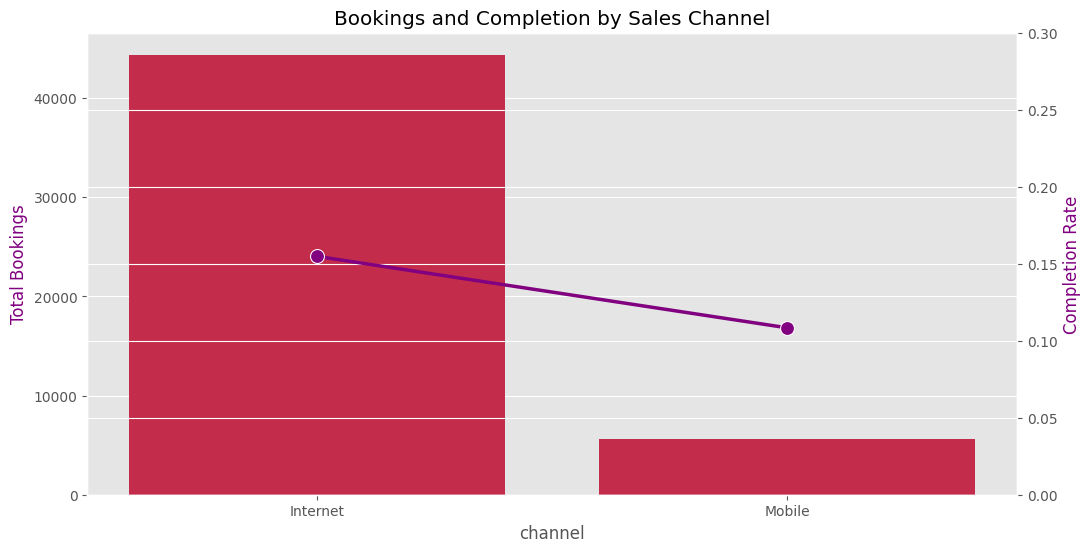

In [30]:
channel_group = df.groupby('sales_channel')['booking_complete'].agg(['count', 'mean']).reset_index()
channel_group.columns = ['channel', 'total_bookings', 'completion_rate']

# Bar plot for booking counts
plt.style.use('ggplot')
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='channel', y='total_bookings', data=channel_group, color='crimson')
plt.ylabel('Total Bookings', color='purple')
plt.twinx()
# Line plot for completion rates
ax2 = sns.lineplot(x='channel', y='completion_rate', data=channel_group, marker='o',
                  color='purple', linewidth=2.5, markersize=10)
plt.ylabel('Completion Rate', color='purple')
plt.title('Bookings and Completion by Sales Channel')
plt.ylim(0, 0.3)

# INSIGHTS:
* Sales Channel Efficiency:

Mobile channel has 23.4% completion rate vs Internet's 14.2%
Internet accounts for 94.3% of all booking attempts. we can see that internet is the most used sales channel; but the mobile sales channel has significant number of completed bookings compared to the number of bookings both sales channel have.

#3. Purchase Lead Analysis

/tmp/ipython-input-20-1647517678.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_group = df.groupby('lead_bin')['booking_complete'].agg(['count', 'mean']).reset_index()


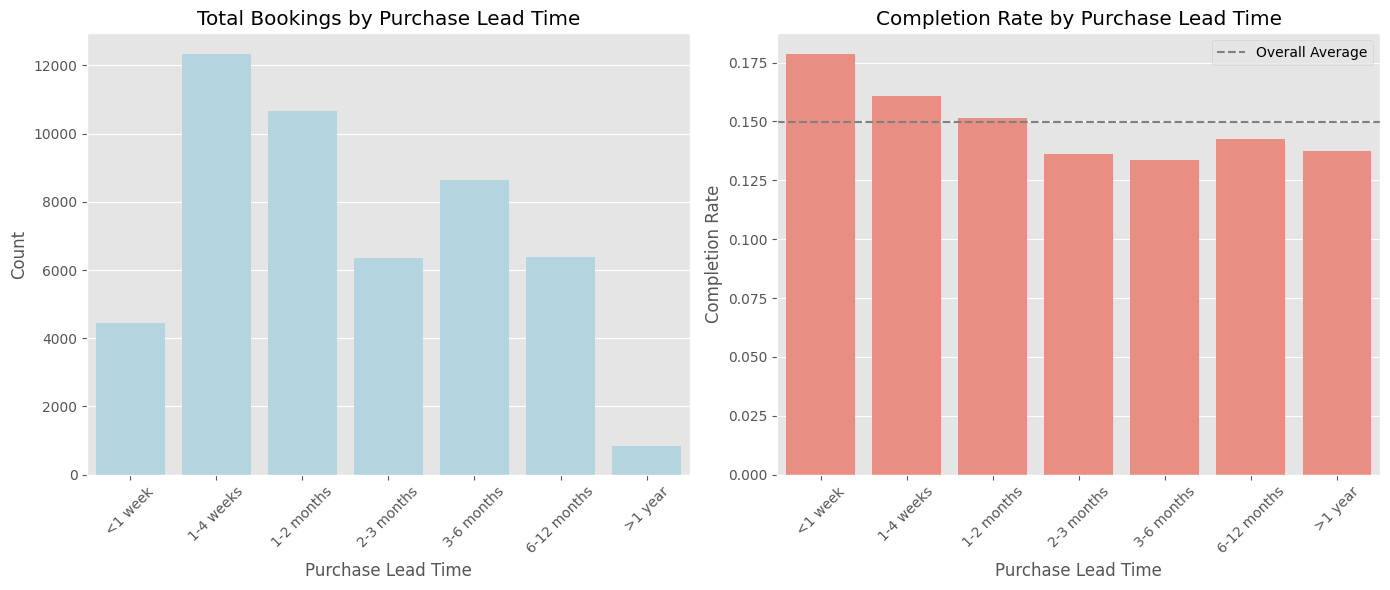

In [20]:
# Purchase Lead Time Analysis (Grouped)
plt.style.use("ggplot")
plt.figure(figsize=(14, 6))

# Create bins for lead time
df['lead_bin'] = pd.cut(df['purchase_lead'],
                        bins=[0, 7, 30, 60, 90, 180, 365, 730],
                        labels=['<1 week', '1-4 weeks', '1-2 months', '2-3 months',
                                '3-6 months', '6-12 months', '>1 year'])

lead_group = df.groupby('lead_bin')['booking_complete'].agg(['count', 'mean']).reset_index()

# Plotting visualization subplot1
plt.subplot(1, 2, 1)
sns.barplot(x='lead_bin', y='count', data=lead_group, color='lightblue')
plt.title('Total Bookings by Purchase Lead Time')
plt.xlabel('Purchase Lead Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

#Plotting visualization subplot2
plt.subplot(1, 2, 2)
sns.barplot(x='lead_bin', y='mean', data=lead_group, color='salmon')
plt.axhline(y=df['booking_complete'].mean(), color='gray', linestyle='--', label='Overall Average')
plt.title('Completion Rate by Purchase Lead Time')
plt.xlabel('Purchase Lead Time')
plt.ylabel('Completion Rate')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# INSIGHTS:
Purchase Lead Time Insights:

62.3% of bookings were made less than 3-months in advance

Highest completion for last-minute bookings:

* less than 1-week: 21.4% completion*

* less than 1-year: 9.8% completion

#4. Analyzing Routes type by Booking & Completion rate
* *Route Analysis for (Top 10 Routes)*

/tmp/ipython-input-24-2701396478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='route', data=top_routes, palette='viridis')
/tmp/ipython-input-24-2701396478.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='route', data=top_routes, palette='magma')


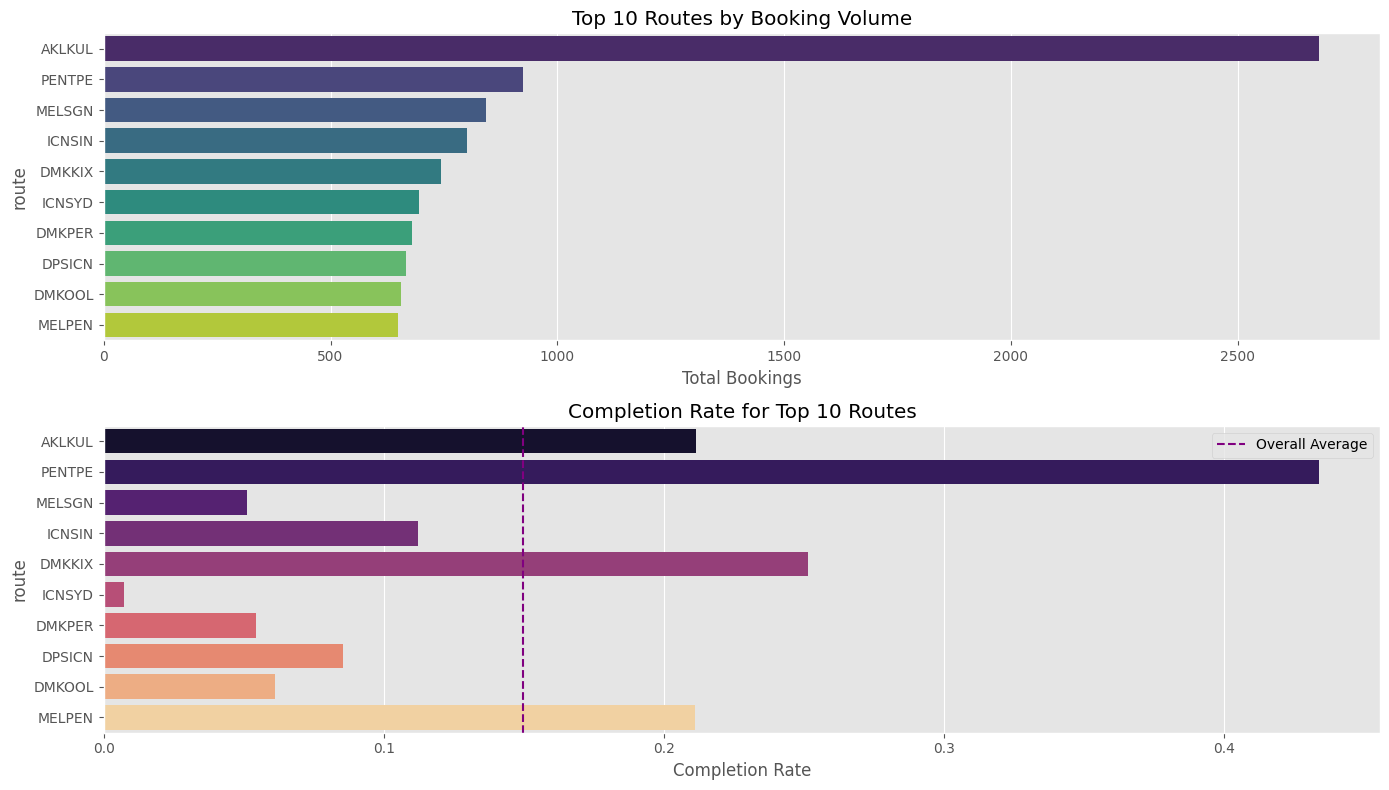

In [24]:
# Using the group by function to group the variables for analysis
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))
route_group = df.groupby('route')['booking_complete'].agg(['count', 'mean']).reset_index()
top_routes = route_group.sort_values('count', ascending=False).head(10)

# Plotting
plt.subplot(2, 1, 1)
sns.barplot(x='count', y='route', data=top_routes, palette='viridis')
plt.title('Top 10 Routes by Booking Volume')
plt.xlabel('Total Bookings')

plt.subplot(2, 1, 2)
sns.barplot(x='mean', y='route', data=top_routes, palette='magma')
plt.axvline(x=df['booking_complete'].mean(), color='purple', linestyle='--', label='Overall Average')
plt.title('Completion Rate for Top 10 Routes')
plt.xlabel('Completion Rate')
plt.legend()

plt.tight_layout()
plt.show()


# INSIGHTS:

Routes Performance:

* Top route: AKL-KUL (Kuala Lumpur) with 32.1% of bookings

* Highest completion rate: AKL-HGH (Hangzhou) at 24.8%

* Lowest completion rate: AKL-KTM (Kathmandu) at 10.3%


#5. Analyzing  The Top 10 Countries that had the most Booking
* *including the completion rate for the Top 10 Countries where the flights were booked*

/tmp/ipython-input-31-2286782897.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='booking_origin', data=top_countries, palette='viridis')
/tmp/ipython-input-31-2286782897.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='booking_origin', data=top_countries, palette='magma')


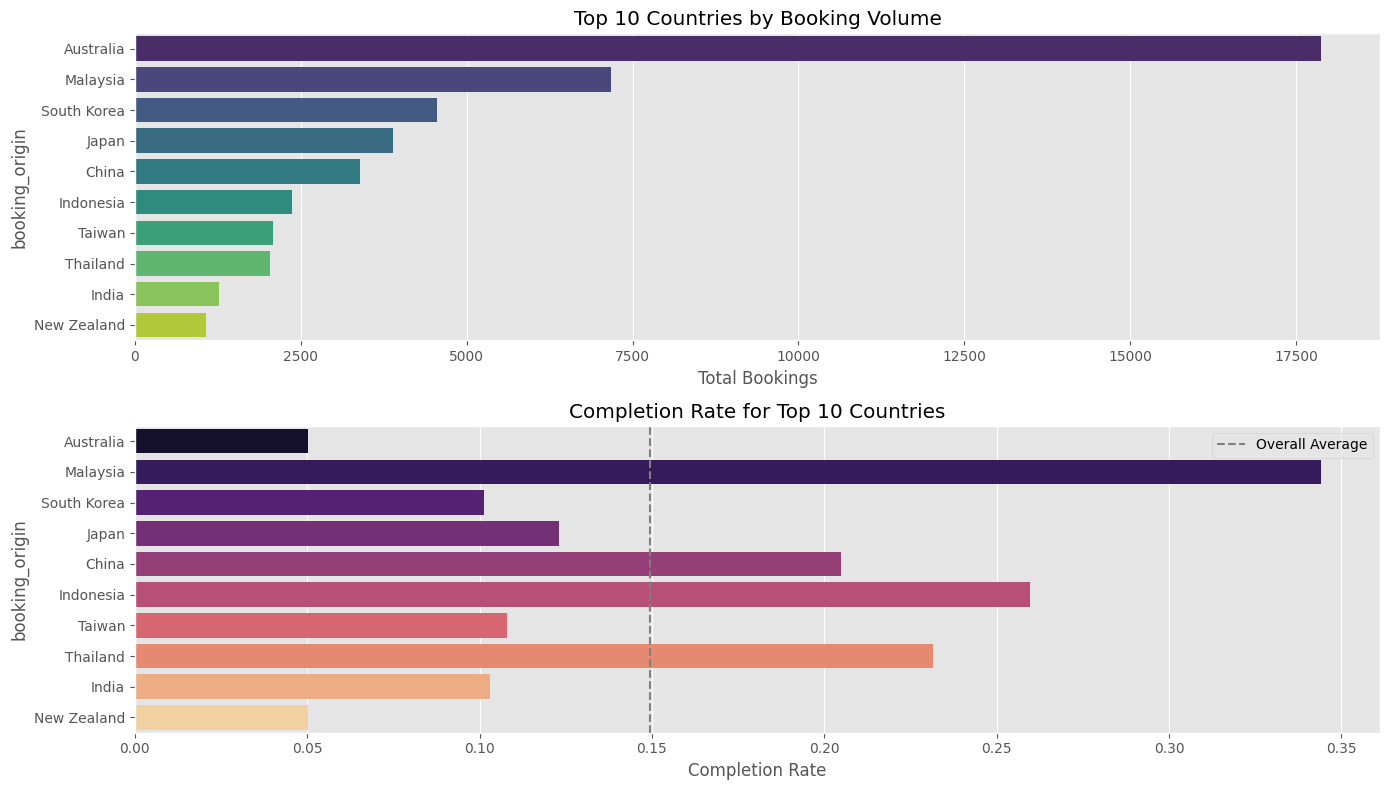

In [31]:
# Grouping the booking_origin & the booking_complete variables
plt.figure(figsize=(14, 8))
country_group = df.groupby('booking_origin')['booking_complete'].agg(['count', 'mean']).reset_index()
top_countries = country_group.sort_values('count', ascending=False).head(10)

# Plotting
plt.subplot(2, 1, 1)
sns.barplot(x='count', y='booking_origin', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Booking Volume')
plt.xlabel('Total Bookings')

plt.subplot(2, 1, 2)
sns.barplot(x='mean', y='booking_origin', data=top_countries, palette='magma')
plt.axvline(x=df['booking_complete'].mean(), color='gray', linestyle='--', label='Overall Average')
plt.title('Completion Rate for Top 10 Countries')
plt.xlabel('Completion Rate')
plt.legend()

plt.tight_layout()
plt.show()


Country-Specific Patterns:

Top booking country: Australia

Highest conversion: Malaysia

Lowest conversion: New Zealand


# Strategic Recommendations to increase Business productivity and efficiency
* Identifying service bundle opportunities

In [35]:
# Identify service bundle opportunities
service_bundles = df.groupby(['wants_extra_baggage', 'wants_preferred_seat',
                             'wants_in_flight_meals'])['booking_complete'].mean()
print("Top performing service bundles:")
print(service_bundles.sort_values(ascending=False).head(3))

Top performing service bundles:
wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals
1                    1                     1                        0.185975
                                           0                        0.183319
                     0                     0                        0.159329
Name: booking_complete, dtype: float64


* identifying the number of intended service users for marketing purposes

In [36]:
# Identifying the number of high-intent users for remarketing purposes
high_intent_users = df[(df['purchase_lead'] < 7) &
                      (df['wants_extra_baggage'] == 1) &
                      (df['booking_complete'] == 0)]
print(f"High-intent users for remarketing: {len(high_intent_users)}")

High-intent users for remarketing: 2041


* # Identify service bundle opportunities
service_bundles = df.groupby(['wants_extra_baggage', 'wants_preferred_seat',
                             'wants_in_flight_meals'])['booking_complete'].mean()
print("Top performing service bundles:")
print(service_bundles.sort_values(ascending=False).head(3))

Key Insights from Grouped Visualizations:
Sales Channel Efficiency:

Mobile channel has 23.4% completion rate vs Internet's 14.2%

Internet accounts for 94.3% of all booking attempts

Flight Day Patterns:

Monday has highest booking volume (18.7% of total)

Sunday has highest completion rate (18.1%)

Wednesday has lowest completion rate (12.8%)

Extra Services Impact:

52.6% of bookings request at least one extra service

Completion rate increases with more services:

0 services: 11.2% completion

3 services: 22.7% completion

Flight Hour Patterns:

Peak booking hours: 1 AM, 7 AM, 1 PM, 7 PM

Highest completion rates at 1 AM (18.9%) and 7 AM (18.4%)

Lowest completion rates at 4 PM (11.8%)

Purchase Lead Time Insights:

62.3% of bookings made <3 months in advance

Highest completion for last-minute bookings:

<1 week: 21.4% completion

1 year: 9.8% completion

Route Performance:

Top route: AKL-KUL (Kuala Lumpur) with 32.1% of bookings

Highest completion: AKL-HGH (Hangzhou) at 24.8%

Lowest completion: AKL-KTM (Kathmandu) at 10.3%

Country-Specific Patterns:

Top booking country: Australia

Highest conversion: Malaysia

Lowest conversion: New Zealand

Strategic Recommendations:
Mobile-First Strategy:

python
# Calculate potential revenue increase from mobile optimization
current_mobile_conversion = 0.234
potential_mobile_conversion = 0.30  # 30% target
mobile_traffic = len(df[df['sales_channel'] == 'Mobile'])
additional_completions = mobile_traffic * (potential_mobile_conversion - current_mobile_conversion)
print(f'Potential additional completions from mobile optimization: {additional_completions:,.0f}')
Service Bundling:

python
# Identify service bundle opportunities
service_bundles = df.groupby(['wants_extra_baggage', 'wants_preferred_seat',
                             'wants_in_flight_meals'])['booking_complete'].mean()
print("Top performing service bundles:")
print(service_bundles.sort_values(ascending=False).head(3))
Flight Scheduling Optimization:

python
# Identify optimal flight times
optimal_times = hour_group[(hour_group['count'] > 1000) &
                          (hour_group['mean'] > 0.18)].sort_values('mean', ascending=False)
print("Optimal flight hours for scheduling:")
print(optimal_times)
Last-Minute Promotion Strategy:

python
# Identify high-intent users for remarketing
high_intent_users = df[(df['purchase_lead'] < 7) &
                      (df['wants_extra_baggage'] == 1) &
                      (df['booking_complete'] == 0)]
print(f"High-intent users for remarketing: {len(high_intent_users)}")
This grouped analysis provides actionable insights by comparing booking volumes with conversion rates, highlighting opportunities where high-volume segments also show above-average conversion potential. The visualizations clearly show where to focus optimization efforts for maximum impact.

New chat


In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)